# Download Data

In [3]:
from sqlalchemy import create_engine
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [5]:
engine = create_engine('sqlite:///data/traffic.db')

In [6]:
table_names = engine.table_names()
print(table_names)

['traffic']


In [7]:
df = pd.read_sql_query("SELECT * FROM traffic WHERE date_time >= '2013-01-01 00:00:00'", engine)

# Preliminary Feel of the Data

In [8]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372
...,...,...,...,...,...,...,...,...,...
45640,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
45641,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
45642,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
45643,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [9]:
df.shape

(45645, 9)

In [10]:
df.columns.to_list()

['holiday',
 'temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_main',
 'weather_description',
 'date_time',
 'traffic_volume']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45645 entries, 0 to 45644
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              45645 non-null  object 
 1   temp                 45645 non-null  float64
 2   rain_1h              45645 non-null  float64
 3   snow_1h              45645 non-null  float64
 4   clouds_all           45645 non-null  int64  
 5   weather_main         45645 non-null  object 
 6   weather_description  45645 non-null  object 
 7   date_time            45645 non-null  object 
 8   traffic_volume       45645 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.1+ MB


In [12]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000
mean,281.554251,0.353004,0.000235,48.468945,3262.734516
std,13.494447,46.027476,0.008393,39.064117,1986.631149
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.416000,0.000000,0.000000,1.000000,1194.000000
50%,283.520000,0.000000,0.000000,64.000000,3388.000000
75%,292.180000,0.000000,0.000000,90.000000,4931.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


## Target Variables - Distributions

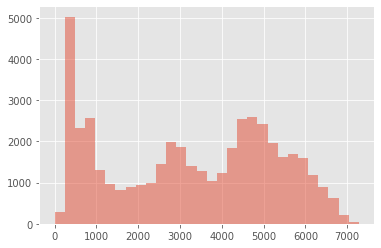

In [13]:
df.traffic_volume.hist(bins = 30, alpha =0.5)

## Some Feature Variables - Distributions

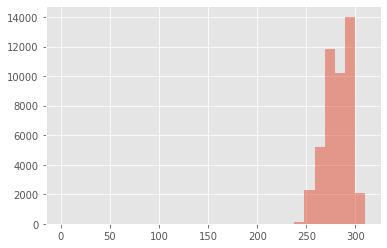

In [14]:
df.temp.hist(bins = 30, alpha =0.5)

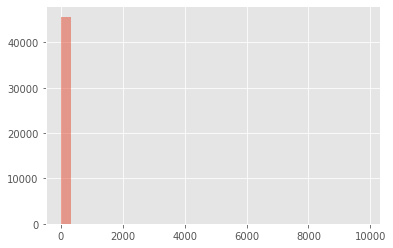

In [15]:
df.rain_1h.hist(bins = 30, alpha =0.5)

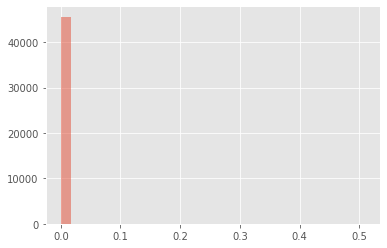

In [16]:
df.snow_1h.hist(bins = 30, alpha =0.5)

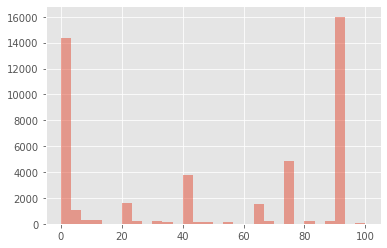

In [17]:
df.clouds_all.hist(bins = 30, alpha =0.5)

## Some Feature Variables -  Weather Text Data

In [18]:
df.holiday.value_counts()

None                         45588
Labor Day                        7
Martin Luther King Jr Day        6
New Years Day                    6
Thanksgiving Day                 5
Independence Day                 5
State Fair                       5
Christmas Day                    5
Washingtons Birthday             5
Memorial Day                     5
Columbus Day                     4
Veterans Day                     4
Name: holiday, dtype: int64

In [19]:
df.weather_main.value_counts()

Clouds          14042
Clear           13007
Rain             5527
Mist             5502
Snow             2679
Drizzle          1726
Haze             1256
Thunderstorm     1021
Fog               861
Smoke              20
Squall              4
Name: weather_main, dtype: int64

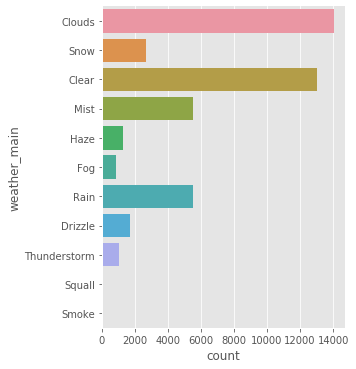

In [20]:
sns.catplot(y="weather_main", data=df,kind="count")
plt.show()

In [21]:
df.weather_description.value_counts()

sky is clear                           11281
mist                                    5502
overcast clouds                         4589
broken clouds                           4378
scattered clouds                        3296
light rain                              3263
light snow                              1946
few clouds                              1779
Sky is Clear                            1726
moderate rain                           1633
haze                                    1256
light intensity drizzle                 1035
fog                                      861
proximity thunderstorm                   666
drizzle                                  622
heavy intensity rain                     463
heavy snow                               439
snow                                     273
proximity shower rain                    135
thunderstorm                             125
heavy intensity drizzle                   63
thunderstorm with heavy rain              61
thundersto

In [22]:
pd.crosstab(df.weather_description, df.weather_main)

weather_main,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm
weather_description,,,,,,,,,,,
SQUALLS,0,0,0,0,0,0,0,0,0,4,0
Sky is Clear,1726,0,0,0,0,0,0,0,0,0,0
broken clouds,0,4378,0,0,0,0,0,0,0,0,0
drizzle,0,0,622,0,0,0,0,0,0,0,0
few clouds,0,1779,0,0,0,0,0,0,0,0,0
fog,0,0,0,861,0,0,0,0,0,0,0
freezing rain,0,0,0,0,0,0,2,0,0,0,0
haze,0,0,0,0,1256,0,0,0,0,0,0
heavy intensity drizzle,0,0,63,0,0,0,0,0,0,0,0


### Insignificant Variables - [temp, clouds_all, snow_1h, rain_1h]

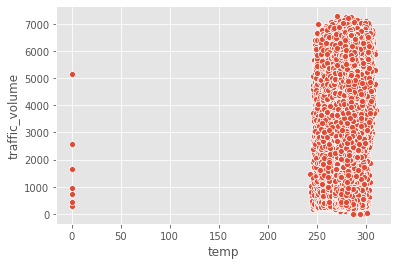

In [23]:
sns.scatterplot(df.temp, df.traffic_volume)

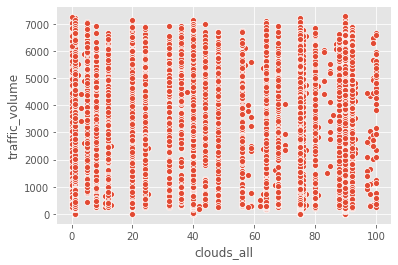

In [24]:
sns.scatterplot(df.clouds_all, df.traffic_volume)

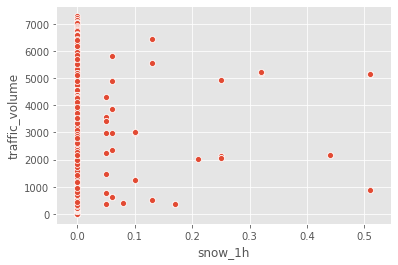

In [25]:
sns.scatterplot(df.snow_1h, df.traffic_volume)

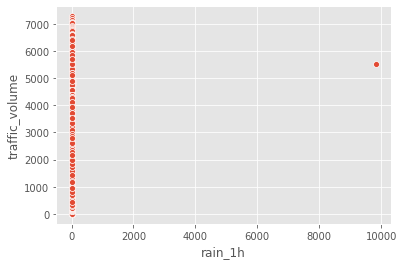

In [26]:
sns.scatterplot(df.rain_1h, df.traffic_volume)

# Data Anamoly & Data Quality

### 1. Temp < 200K, -73 Celsiu - not ok. 

In [27]:
df[df['temp']<200]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
9339,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361
9340,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734
9341,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557
9342,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150
9387,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291
9388,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284
9389,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434
9390,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739
9391,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962
9392,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670


### 2. Traffic Volume looks ok

In [28]:
df[df['traffic_volume']<5]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
14290,None,295.27,0.00,0.0,1,Clear,sky is clear,2015-07-25 08:00:00,1
14291,None,295.82,0.00,0.0,1,Clear,sky is clear,2015-07-25 09:00:00,1
22262,None,294.63,0.00,0.0,40,Clouds,scattered clouds,2016-07-09 23:00:00,1
22601,None,294.42,0.00,0.0,1,Clear,sky is clear,2016-07-23 03:00:00,3
22608,None,299.12,0.00,0.0,75,Thunderstorm,proximity thunderstorm,2016-07-23 10:00:00,3
22612,None,295.30,9.42,0.0,90,Rain,heavy intensity rain,2016-07-23 12:00:00,2
22613,None,295.30,9.42,0.0,90,Thunderstorm,thunderstorm with drizzle,2016-07-23 12:00:00,2
22614,None,295.30,9.42,0.0,90,Mist,mist,2016-07-23 12:00:00,2
22619,None,295.46,0.25,0.0,90,Rain,heavy intensity rain,2016-07-23 14:00:00,2
22620,None,295.46,0.25,0.0,90,Thunderstorm,thunderstorm with rain,2016-07-23 14:00:00,2


### 3. Check Null Values - no Null

In [29]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

# Explore Variable Relationships

In [30]:
df.columns.to_list()

['holiday',
 'temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_main',
 'weather_description',
 'date_time',
 'traffic_volume']

In [31]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372


## Explore Time Data - Hour, Day of A Week, Holiday

### 1. Hour - Significant

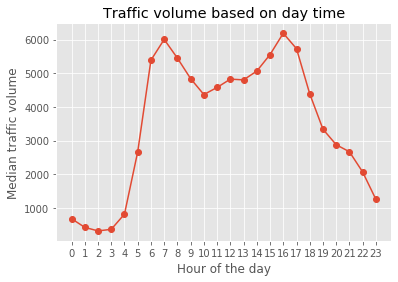

In [32]:
# Create hour feature
df['date_time'] = pd.to_datetime(df.date_time)
df['hour'] = df.date_time.dt.hour

# Find median fare_amount for each hour
hour_traffic = df.groupby('hour', as_index=False)['traffic_volume'].median()

# Plot the line plot
plt.plot(hour_traffic['hour'], hour_traffic['traffic_volume'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median traffic volume')
plt.title('Traffic volume based on day time')
plt.xticks(range(24))
plt.show()

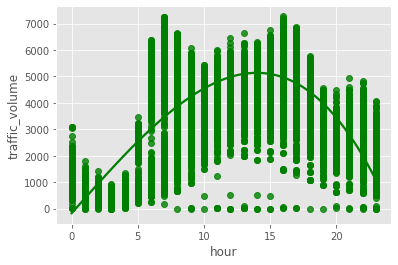

<Figure size 432x288 with 0 Axes>

In [33]:
sns.regplot(data=df,
         y='traffic_volume',
         x="hour",
         color='g',
           order =3)

plt.show()
plt.clf()

### 2. Day of A Week - Significant

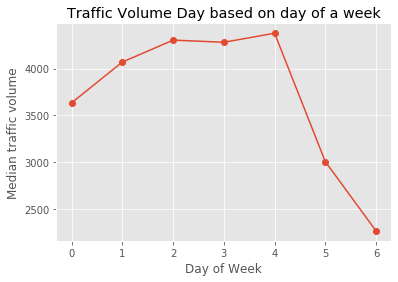

In [34]:
# Create hour feature
df['date_time'] = pd.to_datetime(df.date_time)
df['dayofweek'] = df.date_time.dt.dayofweek

# Find median fare_amount for day of the week
day_of_week_traffic = df.groupby('dayofweek', as_index=False)['traffic_volume'].median()

# Plot the line plot
plt.plot(day_of_week_traffic['dayofweek'], day_of_week_traffic['traffic_volume'], marker='o')
plt.xlabel('Day of Week')
plt.ylabel('Median traffic volume')
plt.title('Traffic Volume Day based on day of a week')
plt.xticks(range(7))
plt.show()

### 3. Holiday - Significant

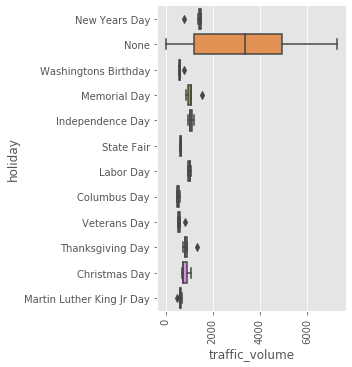

In [35]:
# Create a box plot

sns.catplot(x = 'traffic_volume', y = 'holiday', data = df, kind = 'box')

plt.xticks(rotation=90)
# Show plot
plt.show()

## Explore Weather Text Data - Some Effects

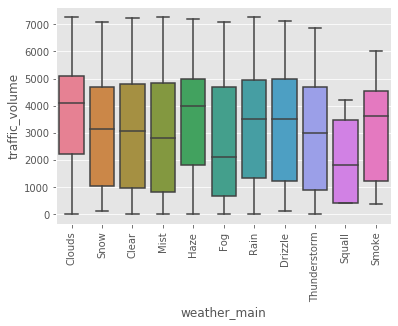

<Figure size 432x288 with 0 Axes>

In [36]:
sns.boxplot(data=df,
        x='weather_main',
         y='traffic_volume',
         palette ='husl')
plt.xticks(rotation=90)
plt.show()
plt.clf()

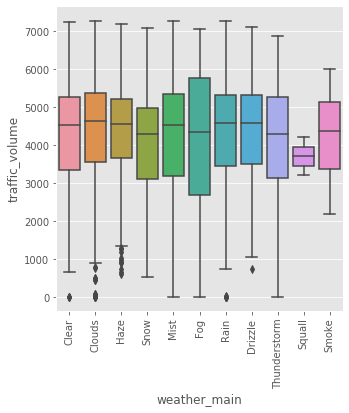

In [37]:
# Create a box plot 

sns.catplot(x = 'weather_main', y = 'traffic_volume', data = df[(df.hour >= 7) & (df.hour <= 21)], kind = 'box')

plt.xticks(rotation=90)
# Show plot
plt.show()

# Explore Models

In [38]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439,0,1
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502,1,1
2,None,264.16,0.0,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,933,2,1
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576,3,1
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372,4,1


In [39]:
df.columns.to_list()

['holiday',
 'temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_main',
 'weather_description',
 'date_time',
 'traffic_volume',
 'hour',
 'dayofweek']

## Feature Engineering

In [40]:
df['year']= df.date_time.dt.year
df['month']= df.date_time.dt.month
df['week']= df.date_time.dt.weekofyear

df['dayofmonth']= df.date_time.dt.day
df['dayofweek']= df.date_time.dt.dayofweek

In [41]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,year,month,week,dayofmonth
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439,0,1,2013,1,1,1
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502,1,1,2013,1,1,1
2,None,264.16,0.0,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,933,2,1,2013,1,1,1
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576,3,1,2013,1,1,1
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372,4,1,2013,1,1,1


In [42]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create new features
df['holiday_enc'] = le.fit_transform(df['holiday'])
df['weather_main_enc'] =  le.fit_transform(df['weather_main'])
df['weather_description_enc'] =  le.fit_transform(df['weather_description'])

# Look at new features
print(df[['holiday_enc', 'weather_main_enc', 'weather_description_enc']].head())

   holiday_enc  weather_main_enc  weather_description_enc
0            6                 1                        2
1            7                 1                       24
2            7                 8                       10
3            7                 1                       19
4            7                 1                       19


In [43]:
#get_kfold_rmse(train)

In [44]:
#def get_kfold_rmse(train):
#    mse_scores = []

#    for train_index, test_index in kf.split(train):
#        train = train.fillna(0)
#        feats = features
#        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
#        rf = RandomForestRegressor(n_estimators=10, min_samples_split=10, random_state=123)

        # Train a model
 #       rf.fit(X=fold_train[feats], y=fold_train['traffic_volume'])

        # Get predictions for the test set
  #      pred = rf.predict(fold_test[feats])
    
   #     fold_score = mean_squared_error(fold_test['traffic_volume'], pred)
    #    mse_scores.append(np.sqrt(fold_score))
        
  #  return round(np.mean(mse_scores) + np.std(mse_scores), 2)

In [45]:
features = ['temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'hour',
 'dayofweek', 
   'holiday_enc', 'weather_main_enc', 'weather_description_enc', 
           'year','month', 'week', 'dayofmonth']

In [46]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3,  random_state=123)

In [47]:
train.shape

(31951, 18)

In [48]:
test.shape

(13694, 18)

## 1. GradientBoost Model

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(train[features], train.traffic_volume)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
test['pred'] = gb.predict(test[features])

/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
test

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,year,month,week,dayofmonth,holiday_enc,weather_main_enc,weather_description_enc,pred
17708,None,267.25,0.00,0.25,90,Mist,mist,2015-12-28 21:00:00,2149,21,0,2015,12,53,28,7,5,17,1826.207399
5670,None,290.13,0.76,0.00,92,Mist,mist,2013-08-06 08:00:00,6188,8,1,2013,8,32,6,7,5,17,5272.279475
36431,None,271.36,0.00,0.00,90,Clouds,overcast clouds,2017-11-16 04:00:00,916,4,3,2017,11,46,16,7,1,19,905.424367
45519,None,281.93,0.00,0.00,20,Clouds,few clouds,2018-09-25 22:00:00,1571,22,1,2018,9,39,25,7,1,4,2197.701685
34120,None,291.15,0.00,0.00,90,Drizzle,light intensity drizzle,2017-08-27 09:00:00,3527,9,6,2017,8,34,27,7,2,11,2925.162687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33197,None,301.08,0.00,0.00,40,Clouds,scattered clouds,2017-07-28 15:00:00,5945,15,4,2017,7,30,28,7,1,24,5751.006455
34647,None,295.36,0.00,0.00,75,Clouds,broken clouds,2017-09-16 12:00:00,5190,12,5,2017,9,37,16,7,1,2,4233.224556
31107,None,289.89,0.00,0.00,40,Rain,light rain,2017-05-16 07:00:00,6326,7,1,2017,5,20,16,7,6,13,5444.445023
29536,None,275.62,0.00,0.00,90,Drizzle,light intensity drizzle,2017-03-26 10:00:00,3584,10,6,2017,3,12,26,7,2,11,3238.294161


In [52]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Measure the local RMSE
rmse = sqrt(mean_squared_error(test['traffic_volume'], test['pred']))
print('RMSE for Baseline I model: {:.3f}'.format(rmse))

RMSE for Baseline I model: 556.497


## 2. Random Forest Model

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Select only numeric features
#features = ['temp',
# 'rain_1h',
# 'snow_1h',
# 'clouds_all',
# 'hour',
# 'dayofweek']

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(train[features], train.traffic_volume)

# Make predictions on the test data
test['pred'] = rf.predict(test[features])

/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Measure the local RMSE
rmse = sqrt(mean_squared_error(test['traffic_volume'], test['pred']))
print('RMSE for Baseline II model: {:.3f}'.format(rmse))

RMSE for Baseline II model: 359.830


## 3. Grid Search For Best Model

In [55]:
from sklearn.model_selection import KFold

In [56]:
def get_cv_score(train, params):
    # Create KFold object
    kf = KFold(n_splits=3, shuffle=True, random_state=123)

    rmse_scores = []
    
    # Loop through each split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
        # Train a Gradient Boosting model
        gb = GradientBoostingRegressor(random_state=123, **params).fit(cv_train[features], cv_train.traffic_volume)
    
        # Make predictions on the test data
        pred = gb.predict(cv_test[features])
    
        fold_score = np.sqrt(mean_squared_error(cv_test['traffic_volume'], pred))
        rmse_scores.append(fold_score)
    
    return np.round(np.mean(rmse_scores) + np.std(rmse_scores), 5)

In [57]:
# Possible max depth values
max_depth_grid = [6, 9, 12]
results = {}

# For each value in the grid
for max_depth_candidate in max_depth_grid:
    # Specify parameters for the model
    params = {'max_depth': max_depth_candidate}

    # Calculate validation score for a particular hyperparameter
    validation_score = get_cv_score(train, params)

    # Save the results for each max depth value
    results[max_depth_candidate] = validation_score   
print(results)

{6: 388.00903, 9: 327.20574, 12: 372.24104}


In [58]:
import itertools

# Hyperparameter grids
max_depth_grid = [8, 9, 10]
subsample_grid = [0.8, 0.9 , 1.0]
results = {}

# For each couple in the grid
for max_depth_candidate, subsample_candidate in itertools.product(max_depth_grid, subsample_grid):
    params = {'max_depth': max_depth_candidate,
              'subsample': subsample_candidate}
    validation_score = get_cv_score(train, params)
    # Save the results for each couple
    results[(max_depth_candidate, subsample_candidate)] = validation_score   
print(results)

{(8, 0.8): 330.0544, (8, 0.9): 335.74631, (8, 1.0): 341.00307, (9, 0.8): 323.59307, (9, 0.9): 324.47034, (9, 1.0): 327.20574, (10, 0.8): 327.31062, (10, 0.9): 323.09442, (10, 1.0): 334.16684}


## 4. Emsemble Method: Blend 2 Models. 

In [59]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor(max_depth = 9 ).fit(train[features], train.traffic_volume)

# Train a Random Forest model
rf = RandomForestRegressor().fit(train[features], train.traffic_volume)

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

# Find mean of model predictions
test['blend'] = (test['gb_pred'] + test['rf_pred']) / 2
print(test[['traffic_volume', 'gb_pred', 'rf_pred', 'blend']].head(3))

/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       traffic_volume      gb_pred  rf_pred        blend
17708            2149  2068.688473  2042.40  2055.544237
5670             6188  6008.698630  6080.24  6044.469315
36431             916   923.943375   897.82   910.881687


/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Measure the local RMSE
rmse = sqrt(mean_squared_error(test['traffic_volume'], test['blend']))
print('RMSE for Baseline III model: {:.3f}'.format(rmse))

RMSE for Baseline III model: 313.532


## 5. Ensemble Method: Model Stacking

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Split train data into two parts
part_1, part_2 = train_test_split(train, test_size=0.5, random_state=123)

# Train a Gradient Boosting model on Part 1
gb = GradientBoostingRegressor(max_depth =9).fit(part_1[features], part_1.traffic_volume)

# Train a Random Forest model on Part 1
rf = RandomForestRegressor().fit(part_1[features], part_1.traffic_volume)

In [62]:
# Make predictions on the Part 2 data
part_2['gb_pred'] = gb.predict(part_2[features])
part_2['rf_pred'] = rf.predict(part_2[features])

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [63]:
from sklearn.linear_model import LinearRegression

# Create linear regression model without the intercept
lr = LinearRegression(fit_intercept=False)

# Train 2nd level model on the Part 2 data
lr.fit(part_2[['gb_pred', 'rf_pred']], part_2.traffic_volume)

# Make stacking predictions on the test data
test['stacking'] = lr.predict(test[['gb_pred', 'rf_pred']])

# Look at the model coefficients
print(lr.coef_)

[ 1.15088959 -0.14937747]


/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Measure the local RMSE
rmse = sqrt(mean_squared_error(test['traffic_volume'], test['stacking']))
print('RMSE for Baseline IV model: {:.3f}'.format(rmse))

RMSE for Baseline IV model: 335.497


In [65]:
test.columns.to_list()

['holiday',
 'temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_main',
 'weather_description',
 'date_time',
 'traffic_volume',
 'hour',
 'dayofweek',
 'year',
 'month',
 'week',
 'dayofmonth',
 'holiday_enc',
 'weather_main_enc',
 'weather_description_enc',
 'pred',
 'gb_pred',
 'rf_pred',
 'blend',
 'stacking']

In [66]:
test[['traffic_volume','pred','gb_pred',
 'rf_pred',
 'blend',
 'stacking' ]]

,traffic_volume,pred,gb_pred,rf_pred,blend,stacking
17708,2149,2058.93,2012.651403,2018.62,2055.544237,2014.803200
5670,6188,5990.64,5981.669031,5810.74,6044.469315,6016.246979
36431,916,888.09,910.087008,888.94,910.881687,914.622055
45519,1571,2113.44,1846.608358,1966.06,2089.548636,1831.557267
34120,3527,3241.76,3266.533011,3065.44,3262.935413,3301.511166
...,...,...,...,...,...,...
33197,5945,5764.97,5839.028799,5715.52,5783.317543,5866.307543
34647,5190,4602.88,4518.105692,4536.03,4602.401282,4522.260122
31107,6326,6417.61,6433.850263,6461.44,6444.608523,6439.457732
29536,3584,3528.58,3510.056524,3496.02,3532.657533,3517.460891


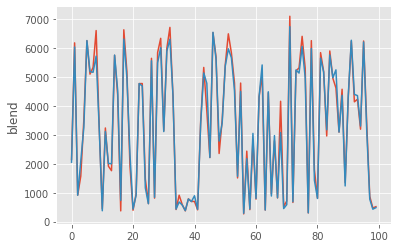

In [67]:
sns.lineplot(range(100),test.traffic_volume.head(100), err_style=None)
sns.lineplot(range(100),test.blend.head(100), err_style=None)

/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if __name__ == '__main__':
/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # Remove the CWD from sys.path while we load stuff.
/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # This is added back by InteractiveShellApp.init_path()


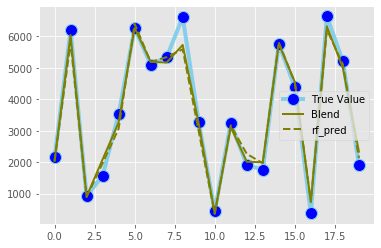

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(20), 'y1': test.traffic_volume.head(20), 'y2': test.blend.head(20), 'y3': test.rf_pred.head(20) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="True Value")
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2, label="Blend" )
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="rf_pred")
plt.legend()

In [69]:
test[['traffic_volume','pred','gb_pred',
 'rf_pred',
 'blend',
 'stacking' ]].head(10)

,traffic_volume,pred,gb_pred,rf_pred,blend,stacking
17708,2149,2058.93,2012.651403,2018.62,2055.544237,2014.803200
5670,6188,5990.64,5981.669031,5810.74,6044.469315,6016.246979
36431,916,888.09,910.087008,888.94,910.881687,914.622055
45519,1571,2113.44,1846.608358,1966.06,2089.548636,1831.557267
34120,3527,3241.76,3266.533011,3065.44,3262.935413,3301.511166
27981,6261,6406.98,6231.010187,6402.12,6268.070506,6214.872270
36476,5105,5155.38,5207.226206,5188.60,5191.026966,5217.882493
35980,5339,5109.00,5090.673952,5341.10,5169.615799,5060.963652
40842,6614,5740.38,5773.217867,5589.02,5727.862245,5809.462676
26347,3276,3049.99,3113.419235,2980.97,3233.131043,3137.912031


# Pipeline Design

In [70]:
df = pd.read_sql_query("SELECT * FROM traffic WHERE date_time >= '2013-01-01 00:00:00'", engine)

In [71]:
df['date_time'] = pd.to_datetime(df.date_time)
df['year']= df.date_time.dt.year
df['month']= df.date_time.dt.month
df['week']= df.date_time.dt.weekofyear
df['hour'] = df.date_time.dt.hour

df['dayofmonth']= df.date_time.dt.day
df['dayofweek']= df.date_time.dt.dayofweek

In [72]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create new features
df['holiday_enc'] = le.fit_transform(df['holiday'])
df['weather_main_enc'] =  le.fit_transform(df['weather_main'])
df['weather_description_enc'] =  le.fit_transform(df['weather_description'])

# Look at new features
print(df[['holiday_enc', 'weather_main_enc', 'weather_description_enc']].head())

   holiday_enc  weather_main_enc  weather_description_enc
0            6                 1                        2
1            7                 1                       24
2            7                 8                       10
3            7                 1                       19
4            7                 1                       19


In [73]:
features = ['temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'hour',
 'dayofweek', 
   'holiday_enc', 'weather_main_enc', 'weather_description_enc', 
           'year','month', 'week', 'dayofmonth']

In [74]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3,  random_state=123)

In [75]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor(max_depth = 9 ).fit(train[features], train.traffic_volume)

# Train a Random Forest model
rf = RandomForestRegressor().fit(train[features], train.traffic_volume)

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

# Find mean of model predictions
test['blend'] = (test['gb_pred'] + test['rf_pred']) / 2
print(test[['traffic_volume', 'gb_pred', 'rf_pred', 'blend']].head(3))

/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       traffic_volume      gb_pred  rf_pred        blend
17708            2149  2068.688473  2066.40  2067.544237
5670             6188  6008.698630  6018.42  6013.559315
36431             916   923.943375   892.31   908.126687


/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Measure the local RMSE
rmse = sqrt(mean_squared_error(test['traffic_volume'], test['blend']))
print('RMSE for Baseline III model: {:.3f}'.format(rmse))

RMSE for Baseline III model: 313.118


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

pl = Pipeline([
        ('GradientBoostingRegressor', GradientBoostingRegressor(max_depth = 9 ))
    ])

pl.fit(train[features], train.traffic_volume)

Pipeline(memory=None,
         steps=[('GradientBoostingRegressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=9, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='deprecated',
                                         

In [78]:
test['pred'] = pl.predict(test[features])

/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
test[['traffic_volume', 'pred']]

,traffic_volume,pred
17708,2149,2068.688473
5670,6188,6008.698630
36431,916,923.943375
45519,1571,1981.757271
34120,3527,3242.950826
...,...,...
33197,5945,5801.155087
34647,5190,4655.622563
31107,6326,6439.577046
29536,3584,3499.995065


/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if __name__ == '__main__':
/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # Remove the CWD from sys.path while we load stuff.


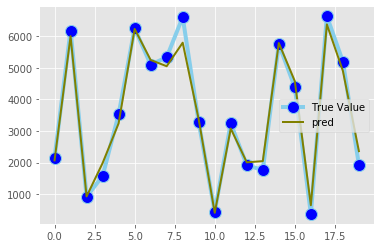

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(20), 'y1': test.traffic_volume.head(20), 'y2': test.pred.head(20) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="True Value")
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2, label="pred" )
plt.legend()

# More Sophisticated Pipeline

In [81]:
df = pd.read_sql_query("SELECT * FROM traffic WHERE date_time >= '2013-01-01 00:00:00'", engine)

In [82]:
df.columns.to_list()

['holiday',
 'temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_main',
 'weather_description',
 'date_time',
 'traffic_volume']

In [83]:
df.holiday.head()

0    New Years Day
1             None
2             None
3             None
4             None
Name: holiday, dtype: object

In [84]:
df.groupby(['weather_main', 'weather_description'])['traffic_volume'].median()

weather_main  weather_description                
Clear         Sky is Clear                           3591.0
              sky is clear                           2989.0
Clouds        broken clouds                          4154.0
              few clouds                             4201.0
              overcast clouds                        3612.0
              scattered clouds                       4362.0
Drizzle       drizzle                                3040.5
              heavy intensity drizzle                3452.0
              light intensity drizzle                3998.0
              shower drizzle                         3185.0
Fog           fog                                    2118.0
Haze          haze                                   3998.0
Mist          mist                                   2795.0
Rain          freezing rain                          4314.0
              heavy intensity rain                   3201.0
              light intensity shower rain         

In [85]:
df.groupby(['weather_main', 'weather_description'])['traffic_volume'].median().sort_values(ascending = False)

weather_main  weather_description                
Snow          shower snow                            5664.0
              sleet                                  5174.0
              light rain and snow                    5141.5
Rain          proximity shower rain                  4555.0
              light intensity shower rain            4507.0
Clouds        scattered clouds                       4362.0
Snow          light shower snow                      4324.0
Rain          freezing rain                          4314.0
Clouds        few clouds                             4201.0
Thunderstorm  thunderstorm with rain                 4171.0
Clouds        broken clouds                          4154.0
Haze          haze                                   3998.0
Drizzle       light intensity drizzle                3998.0
Rain          light rain                             3626.0
Smoke         smoke                                  3612.0
Clouds        overcast clouds                     

In [86]:
df.groupby(['weather_main'])['traffic_volume'].median().sort_values(ascending = False)

weather_main
Clouds          4103.0
Haze            3998.0
Smoke           3612.0
Rain            3504.0
Drizzle         3491.5
Snow            3138.0
Clear           3053.0
Thunderstorm    2980.0
Mist            2795.0
Fog             2118.0
Squall          1818.0
Name: traffic_volume, dtype: float64

In [87]:
df['date_time'] = pd.to_datetime(df.date_time)
df['year']= df.date_time.dt.year
df['month']= df.date_time.dt.month
df['week']= df.date_time.dt.weekofyear
df['hour'] = df.date_time.dt.hour

df['dayofmonth']= df.date_time.dt.day
df['dayofweek']= df.date_time.dt.dayofweek

In [88]:
df['workday'] = df.holiday == 'None'
df.workday = df.workday.astype('int')

In [89]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,week,hour,dayofmonth,dayofweek,workday
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439,2013,1,1,0,1,1,0
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502,2013,1,1,1,1,1,1
2,None,264.16,0.0,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,933,2013,1,1,2,1,1,1
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576,2013,1,1,3,1,1,1
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372,2013,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45640,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018,9,39,19,30,6,1
45641,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018,9,39,20,30,6,1
45642,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018,9,39,21,30,6,1
45643,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018,9,39,22,30,6,1


In [90]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create new features
df['holiday_enc'] = le.fit_transform(df['holiday'])
df['weather_main_enc'] =  le.fit_transform(df['weather_main'])
df['weather_description_enc'] =  le.fit_transform(df['weather_description'])

# Look at new features
print(df[['holiday_enc', 'weather_main_enc', 'weather_description_enc']].head())

   holiday_enc  weather_main_enc  weather_description_enc
0            6                 1                        2
1            7                 1                       24
2            7                 8                       10
3            7                 1                       19
4            7                 1                       19


In [91]:
features = ['temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'hour',
 'dayofweek', 
   'holiday_enc', 'weather_main_enc', 'weather_description_enc', 
           'year','month', 'week', 'dayofmonth', 'workday']

In [92]:
num_features = ['temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'hour',
 'dayofweek', 
          'holiday_enc', 'year','month', 'week', 'dayofmonth', 'workday']

In [93]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3,  random_state=123)

In [94]:
TEXT_COLUMNS = ['weather_main', 'weather_description']
df[TEXT_COLUMNS]

,weather_main,weather_description
0,Clouds,broken clouds
1,Clouds,scattered clouds
2,Snow,heavy snow
3,Clouds,overcast clouds
4,Clouds,overcast clouds
...,...,...
45640,Clouds,broken clouds
45641,Clouds,overcast clouds
45642,Thunderstorm,proximity thunderstorm
45643,Clouds,overcast clouds


In [95]:
def combine_text_columns(data_frame, to_add=TEXT_COLUMNS):
    """ converts all text in each row of data_frame to single vector """
    
    text_data = data_frame[TEXT_COLUMNS]

    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [96]:
combine_text_columns(df)

0                       Clouds broken clouds
1                    Clouds scattered clouds
2                            Snow heavy snow
3                     Clouds overcast clouds
4                     Clouds overcast clouds
                        ...                 
45640                   Clouds broken clouds
45641                 Clouds overcast clouds
45642    Thunderstorm proximity thunderstorm
45643                 Clouds overcast clouds
45644                 Clouds overcast clouds
Length: 45645, dtype: object

In [97]:
from sklearn.preprocessing import FunctionTransformer, normalize, StandardScaler

get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[num_features], validate=False)

In [98]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data)
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(ngram_range=(1, 2)))
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('GradientBoostingRegressor', GradientBoostingRegressor(max_depth = 9 ))
    ])


# Fit pl to the training data
pl.fit(train, train.traffic_volume)

Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numeric_features',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  FunctionTransformer(accept_sparse=False,
                                                                                      check_inverse=True,
                                                                                      func=<function <lambda> at 0x1a186125f0>,
                                                                                      inv_kw_args=None,
                                                                                      inverse_func=None,
                                                                                      kw_args=None,
                                         

In [99]:
test['pred'] = pl.predict(test)

/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Measure the local RMSE
rmse = sqrt(mean_squared_error(test['traffic_volume'], test['pred']))
print('RMSE for Baseline I model: {:.3f}'.format(rmse))

RMSE for Baseline I model: 310.551


In [101]:
test[['traffic_volume', 'pred']]

,traffic_volume,pred
17708,2149,2026.791851
5670,6188,6086.244507
36431,916,917.917427
45519,1571,2012.311169
34120,3527,3439.870185
...,...,...
33197,5945,5713.813431
34647,5190,4613.224703
31107,6326,6484.823889
29536,3584,3426.851117


/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if __name__ == '__main__':
/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # Remove the CWD from sys.path while we load stuff.


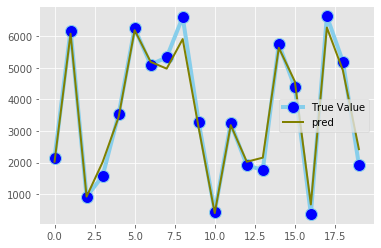

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(20), 'y1': test.traffic_volume.head(20), 'y2': test.pred.head(20) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="True Value")
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2, label="pred" )
plt.legend()

In [103]:
test.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,week,hour,dayofmonth,dayofweek,workday,holiday_enc,weather_main_enc,weather_description_enc,pred
17708,None,267.25,0.00,0.25,90,Mist,mist,2015-12-28 21:00:00,2149,2015,12,53,21,28,0,1,7,5,17,2026.791851
5670,None,290.13,0.76,0.00,92,Mist,mist,2013-08-06 08:00:00,6188,2013,8,32,8,6,1,1,7,5,17,6086.244507
36431,None,271.36,0.00,0.00,90,Clouds,overcast clouds,2017-11-16 04:00:00,916,2017,11,46,4,16,3,1,7,1,19,917.917427
45519,None,281.93,0.00,0.00,20,Clouds,few clouds,2018-09-25 22:00:00,1571,2018,9,39,22,25,1,1,7,1,4,2012.311169
34120,None,291.15,0.00,0.00,90,Drizzle,light intensity drizzle,2017-08-27 09:00:00,3527,2017,8,34,9,27,6,1,7,2,11,3439.870185
27981,None,272.64,0.00,0.00,1,Clear,sky is clear,2017-01-27 16:00:00,6261,2017,1,4,16,27,4,1,7,0,27,6197.747197
36476,None,275.92,0.00,0.00,90,Mist,mist,2017-11-17 13:00:00,5105,2017,11,46,13,17,4,1,7,5,17,5192.220312
35980,None,272.92,0.00,0.00,90,Snow,light snow,2017-11-01 09:00:00,5339,2017,11,44,9,1,2,1,7,8,16,4979.222094
40842,None,272.99,0.00,0.00,90,Clouds,overcast clouds,2018-04-18 08:00:00,6614,2018,4,16,8,18,2,1,7,1,19,5916.662185
26347,None,264.89,0.00,0.00,90,Snow,light snow,2016-12-07 19:00:00,3276,2016,12,49,19,7,2,1,7,8,16,3093.572089


/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if __name__ == '__main__':
/Users/dingsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # Remove the CWD from sys.path while we load stuff.


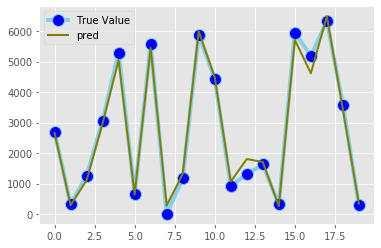

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(20), 'y1': test.traffic_volume.tail(20), 'y2': test.pred.tail(20) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="True Value")
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2, label="pred" )
plt.legend()